<a href="https://colab.research.google.com/github/ShehanPer/ImageClassification/blob/main/Pytorch_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [9]:
import torch
import numpy as np
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt



In [10]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 54088136.13it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1521633.15it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 11522472.00it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7003870.87it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [11]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [12]:
test_data


Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [13]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [14]:
from torch.utils.data import DataLoader

loaders = {
    'train':DataLoader(train_data,
                       batch_size=100,
                       shuffle = True,
                       num_workers = 1),
    'test':DataLoader(test_data,
                       batch_size=100,
                       shuffle = True,
                       num_workers = 1),

}

In [15]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7fc3090af310>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7fc3090aeef0>}

In [22]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class CNN(nn.Module):

  def __init__(self):
    super(CNN,self).__init__()

    self.conv1 = nn.Conv2d(1,10,kernel_size=5)
    self.conv2 = nn.Conv2d(10,20,kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self,x):
    x = F.relu(F.max_pool2d(self.conv1(x),2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
    x = x.view(-1,320)
    x = F.relu(self.fc1(x))

    x = F.dropout(x,training = self.training)
    x = self.fc2(x)

    return F.softmax(x)



In [23]:
import torch

model = CNN()
optimizer = optim.Adam(model.parameters(),lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx,(data,target) in enumerate(loaders['train']):
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output,target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 ==0:
      print(f'Train Epoch: {epoch} [ {batch_idx*len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\tLoss: {loss.item():.6f}')

def test():
  model.eval()

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data,target in loaders['test']:
      output = model(data)
      test_loss += loss_fn(output,target).item()
      pred = output.argmax(dim=1,keepdim=True)
      correct += pred.eq(target.view_as(pred)).sum().item()

  test_loss /= len(loaders['test'].dataset)
  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(loaders['test'].dataset),
    100. * correct / len(loaders['test'].dataset)))


In [24]:
for epoch in range(1,10):
  train(epoch)
  test()

<ipython-input-22-bc70bc70c887>:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [ 0/60000 (0%)]	Loss: 2.303529
Train Epoch: 1 [ 2000/60000 (3%)]	Loss: 2.291775
Train Epoch: 1 [ 4000/60000 (7%)]	Loss: 2.124820
Train Epoch: 1 [ 6000/60000 (10%)]	Loss: 2.047364
Train Epoch: 1 [ 8000/60000 (13%)]	Loss: 1.921802
Train Epoch: 1 [ 10000/60000 (17%)]	Loss: 1.795447
Train Epoch: 1 [ 12000/60000 (20%)]	Loss: 1.838482
Train Epoch: 1 [ 14000/60000 (23%)]	Loss: 1.685088
Train Epoch: 1 [ 16000/60000 (27%)]	Loss: 1.721028
Train Epoch: 1 [ 18000/60000 (30%)]	Loss: 1.821711
Train Epoch: 1 [ 20000/60000 (33%)]	Loss: 1.795497
Train Epoch: 1 [ 22000/60000 (37%)]	Loss: 1.743688
Train Epoch: 1 [ 24000/60000 (40%)]	Loss: 1.684811
Train Epoch: 1 [ 26000/60000 (43%)]	Loss: 1.704418
Train Epoch: 1 [ 28000/60000 (47%)]	Loss: 1.699343
Train Epoch: 1 [ 30000/60000 (50%)]	Loss: 1.653996
Train Epoch: 1 [ 32000/60000 (53%)]	Loss: 1.676295
Train Epoch: 1 [ 34000/60000 (57%)]	Loss: 1.608384
Train Epoch: 1 [ 36000/60000 (60%)]	Loss: 1.631094
Train Epoch: 1 [ 38000/60000 (63%)]	Loss: 

Prediction: 1
Target: 1


/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1381: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn("dropout2d: Received a 3D input to dropout2d and assuming that channel-wise "
<ipython-input-22-bc70bc70c887>:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


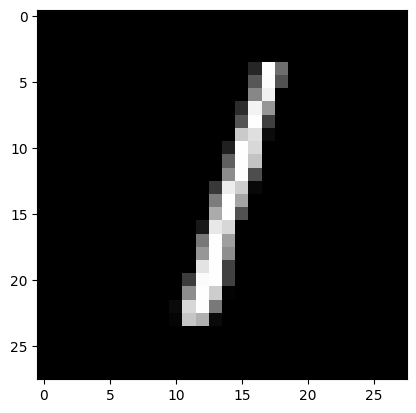

In [51]:
model.eval()
data,target = test_data[2]
output =model(data)
prediction = output.argmax(dim=1,keepdim=True).item()
print(f'Prediction: {prediction}')
print(f'Target: {target}')
image = data.squeeze()
plt.imshow(image,cmap='gray')
plt.show()


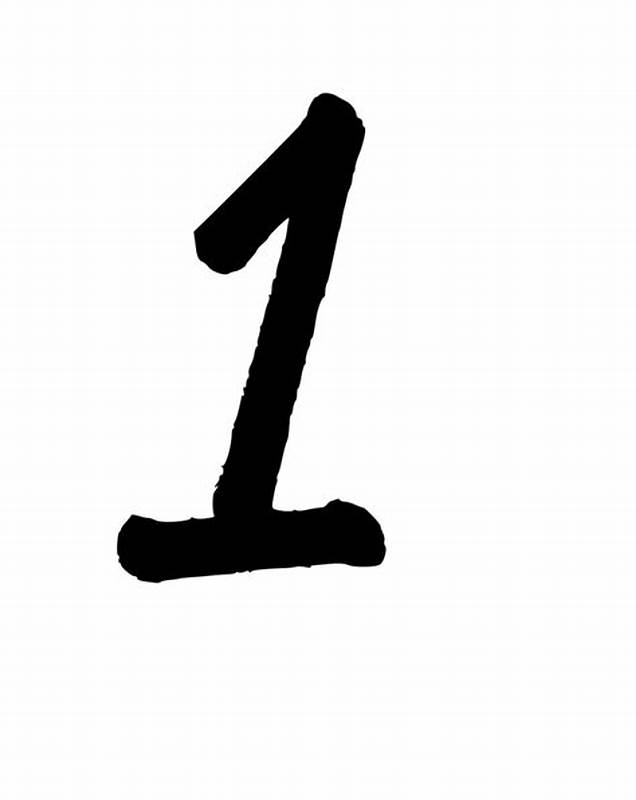

In [31]:
from IPython.display import Image

Image(filename="/one_num.jpg")

tensor([[2.6107e-08, 2.3660e-05, 1.1463e-05, 1.4181e-05, 9.9995e-01, 1.2211e-09,
         3.7293e-09, 3.7759e-06, 4.7507e-09, 1.2511e-06]],
       grad_fn=<SoftmaxBackward0>)
Prediction: 4


<ipython-input-22-bc70bc70c887>:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


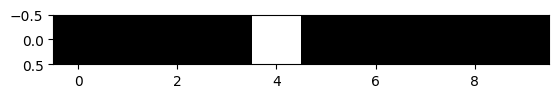

In [58]:
# Import necessary libraries
from PIL import Image
import torchvision.transforms as transforms

# Load and resize the image
image = Image.open("/3_space.png").resize((28, 28))

# Convert to grayscale
image = image.convert('L')

# Preprocess the image
transform = transforms.ToTensor()
image = transform(image).unsqueeze(0)

# Make prediction
model.eval()
output = model(image)
prediction = output.argmax(dim=1, keepdim=True).item()
print(output)
# Print the prediction
print(f"Prediction: {prediction}")
#show predicted image
image = image.squeeze()
plt.imshow(image, cmap='gray')
#plt.show()
import torch

# Create a random tensor
tensor = output

# Normalize the tensor
tensor = tensor * 255 / tensor.max()

# Convert the tensor to a NumPy array
image_array = tensor.detach().cpu().numpy()

# Display the image
import matplotlib.pyplot as plt

plt.imshow(image_array, cmap="gray")
plt.show()


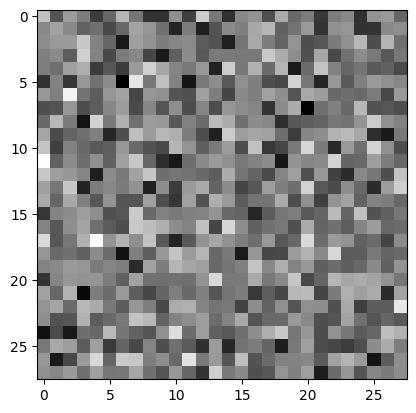

In [55]:
import torch

# Create a random tensor
tensor = torch.randn(1, 28, 28)

# Normalize the tensor
tensor = tensor * 255 / tensor.max()

# Convert the tensor to a NumPy array
image_array = tensor.squeeze().cpu().numpy()

# Display the image
import matplotlib.pyplot as plt

plt.imshow(image_array, cmap="gray")
plt.show()